In [333]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [334]:
df = pd.read_csv("loanprediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [335]:
dt = df.drop('Loan_ID',axis=1)
dt.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [336]:
dt.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [337]:
dt.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [338]:
dt['Dependents'].nunique()

4

In [339]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [340]:
num_cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']


cat_cols =['Gender', 'Married', 'Education', 'Self_Employed','Property_Area','Dependents']

In [341]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler

In [342]:
le= LabelEncoder()
dt_y=le.fit_transform(dt['Loan_Status'])


In [343]:
num_trans=Pipeline(steps=[
    ('imp',SimpleImputer(strategy="mean")),
    ('scale',MinMaxScaler())
])
SimpleImputer(strategy="mean")

col_trans=Pipeline(steps=[
    ('imp',SimpleImputer(strategy='most_frequent')),
    ('encode',OneHotEncoder(handle_unknown='ignore',drop='first'))
])


In [344]:
preprocessor = ColumnTransformer([
    ('num',num_trans,num_cols),
    ('cat',col_trans,cat_cols),
    #('lbl',lbl_trans,dt['Loan_Status'])
]
)

In [345]:
data=preprocessor.fit_transform(dt)

In [346]:
ohe = preprocessor.named_transformers_['cat'].named_steps['encode']
ohe_col = ohe.get_feature_names_out(cat_cols)

all_cols =num_cols+list(ohe_col)

data=pd.DataFrame(data,columns=all_cols)
data['Loan status'] =dt_y

In [347]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Loan status
0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,0.054830,0.036192,0.172214,0.74359,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,0.072356,0.000000,0.191027,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


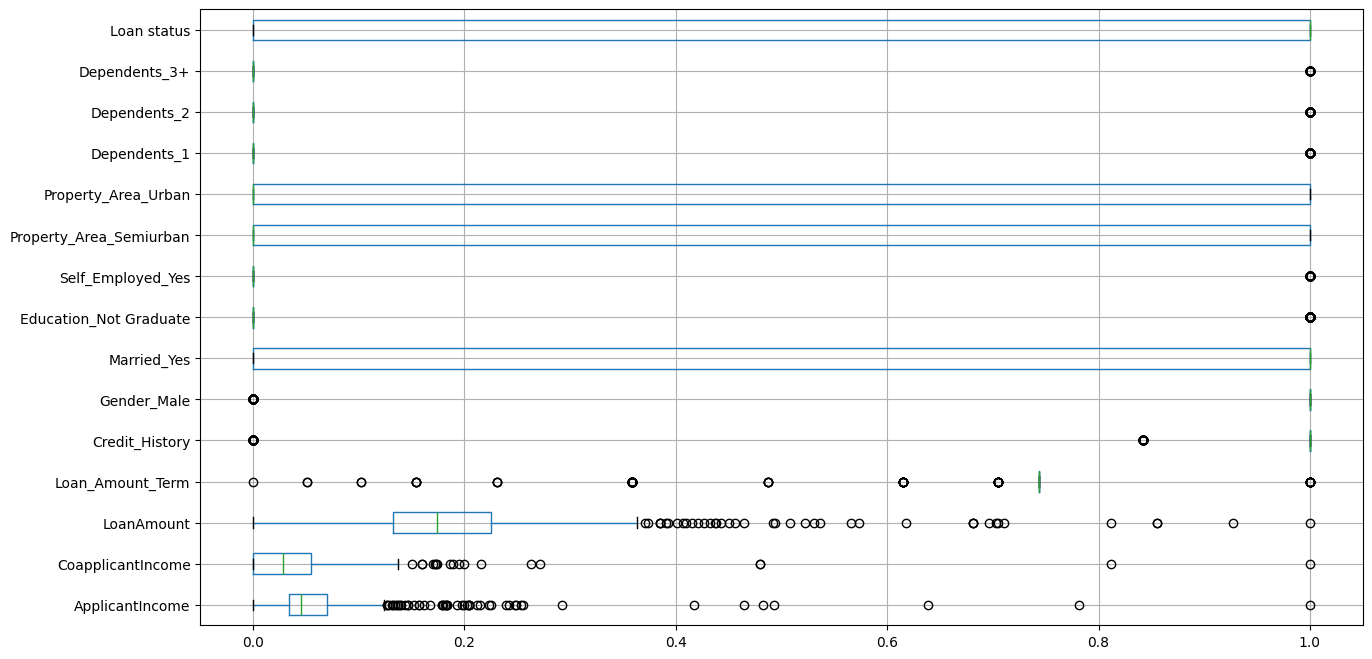

In [348]:
plt.figure(figsize=(15,8))
data.select_dtypes(include="number").boxplot(vert=False)
plt.show()

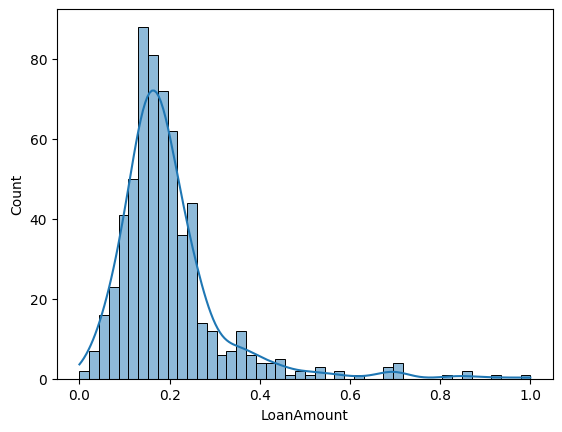

In [349]:
sns.histplot(data['LoanAmount'],kde=True)
plt.show()

Removing outliers 

In [350]:
#another method
#from sklearn.ensemble import IsolationForest

#iso = IsolationForest(contamination=0.05)
#pred = iso.fit_predict(data[['LoanAmount','ApplicantIncome','CoapplicantIncome']])

#data = data[pred == 1]
#data.shape

In [351]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return df[(df[col] >= lower) & (df[col] <= upper)]

data = remove_outliers_iqr(data, 'LoanAmount')
data = remove_outliers_iqr(data, 'CoapplicantIncome')
data = remove_outliers_iqr(data, 'ApplicantIncome')

data.shape


(514, 15)

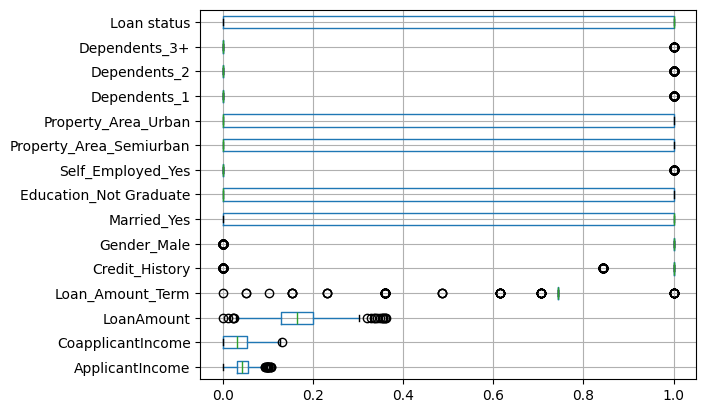

In [352]:
data.select_dtypes(include="number").boxplot(vert=False)
plt.show()

In [365]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

x =data.drop('Loan status',axis=1)
y=data['Loan status']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [367]:
y_predict=lg.predict(X_test)

print(classification_report(y_test, y_predict))
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.49      0.64        39
           1       0.82      0.99      0.89        90

    accuracy                           0.84       129
   macro avg       0.88      0.74      0.77       129
weighted avg       0.86      0.84      0.82       129

Accuracy: 0.8372093023255814
Confusion Matrix:
 [[19 20]
 [ 1 89]]
